In [1]:
import pandas as pd #датафреймы
import numpy as np #массивы, линейная алгебра
import pylab as pl #графики
import matplotlib as mpl #графики
%matplotlib inline
%pylab inline
import seaborn as sns #красивые графики!

Populating the interactive namespace from numpy and matplotlib


### Prepare data

We read data and delete those not being used

In [2]:
df=pd.read_csv('OUT_4.csv', index_col=False, header =0)
del df['Geomomentum']

We round "seconds" so that they are float (it's okay because timedeltas will be much bigger) and delete a few rows with seconds=60.

In [3]:
import math
df.Second=df.Second.astype(int)
df.drop(df.loc[df.Second==60].index, inplace=True)

We get dates and timedeltas, then convert them to logarithmic scale

In [4]:
import datetime
df.string=df.Year.astype(str)+'-'+df.Month.astype(str)+'-'+df.Day.astype(str)+' '+df.Hour.astype(str)+':'+df.Minute.astype(str)+':'+df.Second.astype(str)

In [5]:
df['Date']=pd.to_datetime(df.string)

In [6]:
df['t']=df['Date'].diff().fillna(0)

In [7]:
df['logtime']=df.t / np.timedelta64(1, 's')

We delete rows with timedelta=0 to avoid problems with log.

In [8]:
df.drop(df.loc[df.logtime==0].index, inplace=True)

In [9]:
df.logtime=df.logtime.apply(lambda x: math.log(x))

## Distributions

### Time interval distribution (log scale)

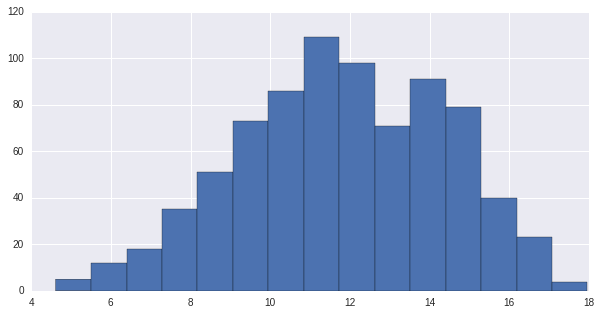

In [10]:
df.logtime.hist(figsize=(10,5), bins=15)

### Depth distribution

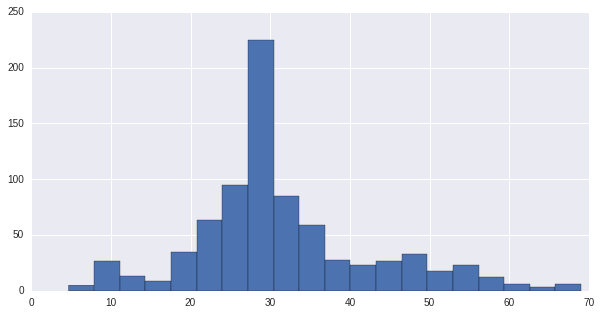

In [11]:
df.Depth.hist(figsize=(10,5), bins=20)

### Magnitude distribution

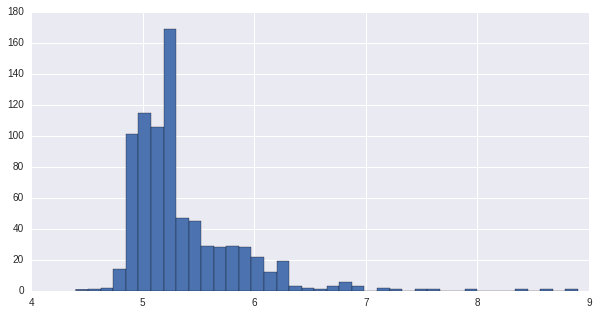

In [12]:
df.Magnitude.hist(figsize=(10,5), bins=40)

### Joint depth and magnitude distribution

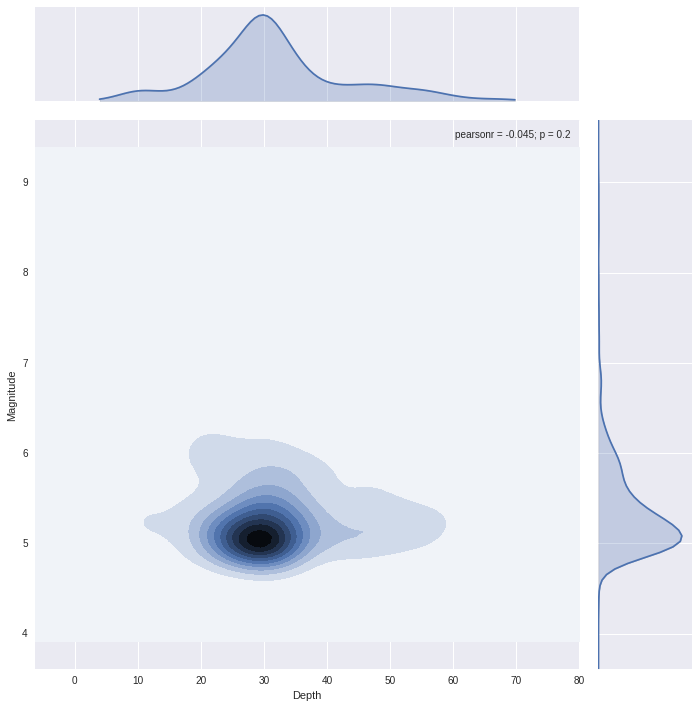

In [13]:
sns.jointplot(x='Depth', y='Magnitude', data=df, size=10,kind='kde');

### Joint depth and time interval (log) distribution

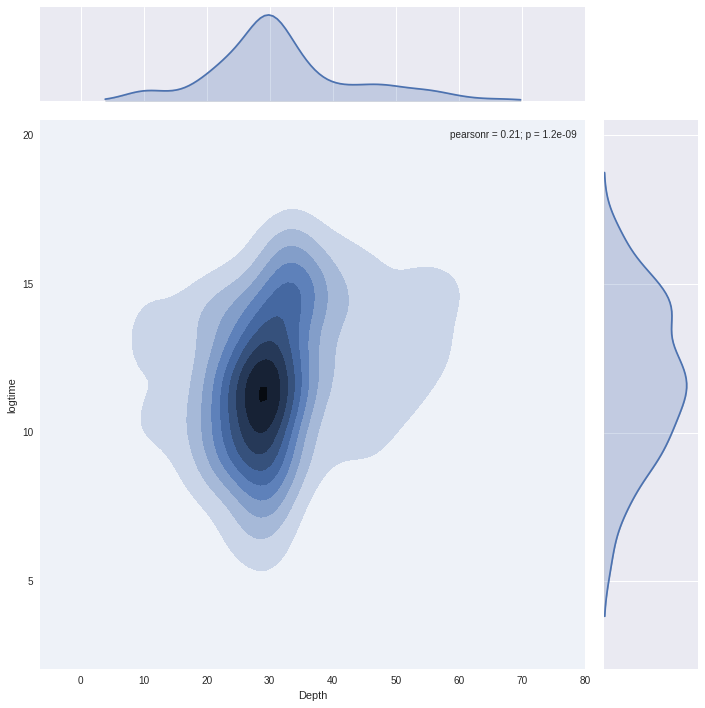

In [14]:
sns.jointplot(x='Depth', y='logtime', data=df, size=10,kind='kde');

### Joint magnitude and time interval (log) distribution

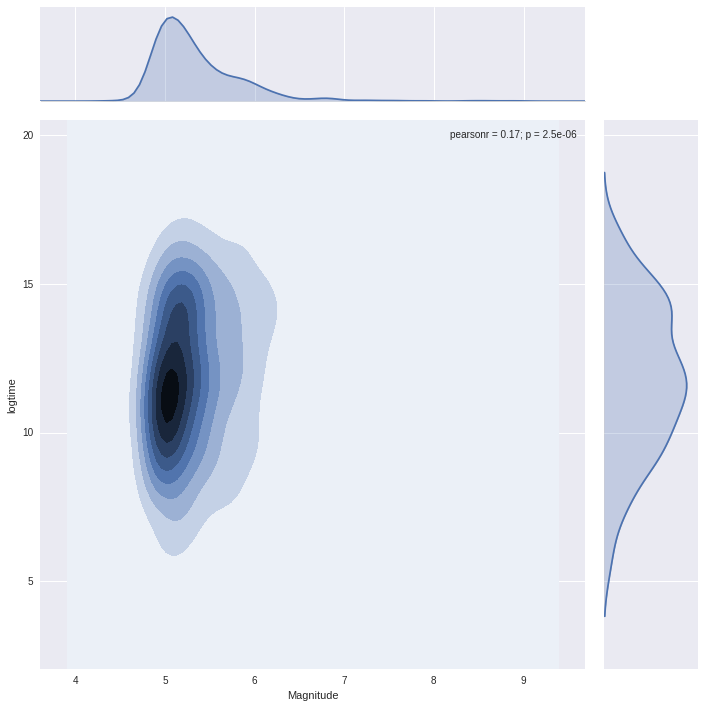

In [15]:
sns.jointplot(x='Magnitude', y='logtime', data=df, size=10,kind='kde');